In [1]:
import os
import json
import pickle
import numpy as np
import pandas as pd

import warnings

warnings.filterwarnings(action='ignore')

DATA_PATH = '/opt/ml/final-project-level3-recsys-05/Model/Model-Experiment/data'
VAL_TO_IDX_DATA_PATH = '/opt/ml/final-project-level3-recsys-05/Model/Model-Server/data'
EMBEDDING_PATH = '/opt/ml/final-project-level3-recsys-05/Model/Model-Experiment/embedding'

In [2]:
with open(os.path.join(VAL_TO_IDX_DATA_PATH, 'clean_problem_id_to_idx.json'), 'r', encoding = 'utf-8') as f:
    problem_id2idx = json.load(f)

In [3]:
problem_df = pd.read_csv(os.path.join(DATA_PATH, 'clean_problem.csv'))
problem_df['problem_id'] = problem_df['problem_id'].astype(str)
problem_df['problem_id2idx'] = problem_df['problem_id'].apply(lambda x : int(problem_id2idx[x]))

In [4]:
with open(os.path.join(EMBEDDING_PATH, 'Item2Vec-Embedding.pickle'), 'rb') as file: 
    item2vec_emb = pickle.load(file)

with open(os.path.join(EMBEDDING_PATH, 'LightGCN-Embedding.pickle'), 'rb') as file: 
    gcn_emb = pickle.load(file)

with open(os.path.join(EMBEDDING_PATH, 'Seq-Embedding.pickle'), 'rb') as file: 
    seq_emb = pickle.load(file)

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 0)
tsne_vectors = tsne.fit_transform(item2vec_emb)

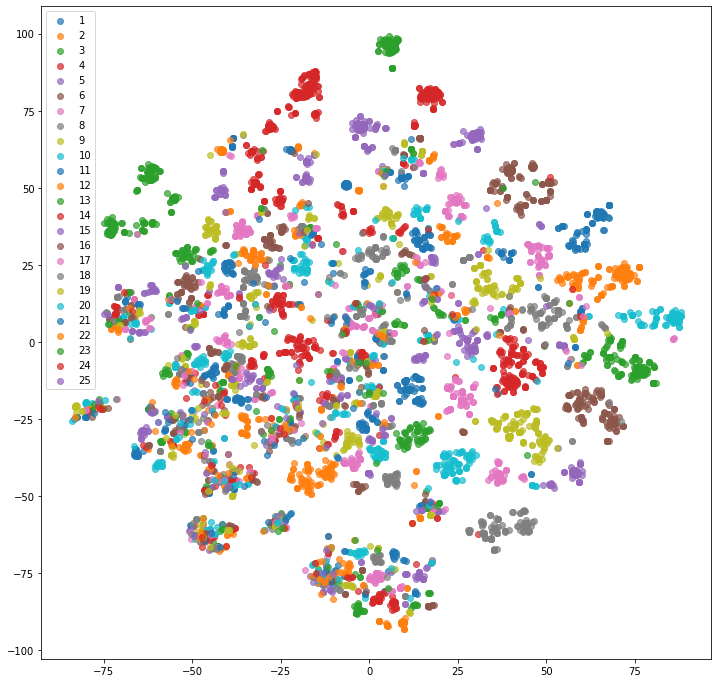

In [6]:
import matplotlib.pyplot as plt

# 태그 + 레벨 + 연관 문제 의 특성이 반영됨

plt.figure(figsize = (12, 12))

for level in sorted(problem_df['level'].unique()):
    idx = problem_df[problem_df['level'] == level]['problem_id2idx'].tolist()
    plt.scatter(x = tsne_vectors[idx, 0], y = tsne_vectors[idx, 1], alpha = 0.7, label = f'{level}') 

plt.legend()
plt.show()

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 0)
tsne_vectors = tsne.fit_transform(gcn_emb)

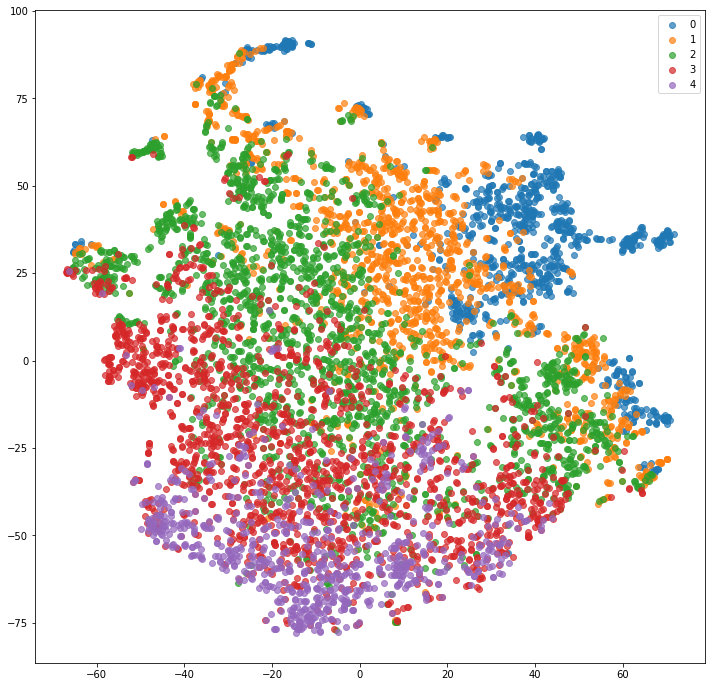

In [8]:
import matplotlib.pyplot as plt

# 그래프 속의 유저와 아이템 간의 연관성을 바탕으로 아이템을 임베딩 했는데
# 유저 별로 푸는 레벨적 특성이 존재하는 것 같음
# 왜? 임베딩 내에 레벨이 특징이 뚜렷함

plt.figure(figsize = (12, 12))

problem_df['level_tag'] = problem_df['level'].apply(lambda x : (x - 1) // 5)

for level_tag in sorted(problem_df['level_tag'].unique()):
    idx = problem_df[problem_df['level_tag'] == level_tag]['problem_id2idx'].tolist()
    plt.scatter(x = tsne_vectors[idx, 0], y = tsne_vectors[idx, 1], alpha = 0.7, label = f'{level_tag}') 

plt.legend()
plt.show()

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 0)
tsne_vectors = tsne.fit_transform(seq_emb)

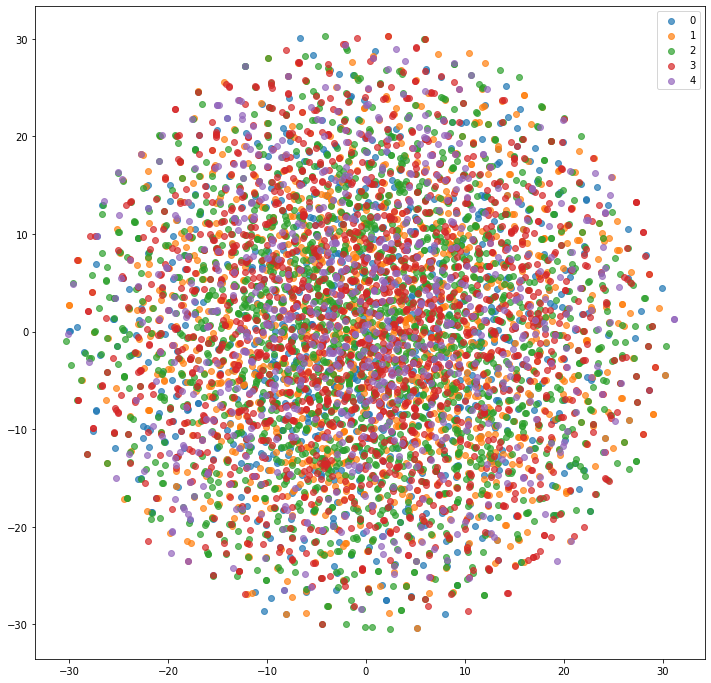

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

problem_df['level_tag'] = problem_df['level'].apply(lambda x : (x - 1) // 5)

for level_tag in sorted(problem_df['level_tag'].unique()):
    idx = problem_df[problem_df['level_tag'] == level_tag]['problem_id2idx'].tolist()
    plt.scatter(x = tsne_vectors[idx, 0], y = tsne_vectors[idx, 1], alpha = 0.7, label = f'{level_tag}') 

plt.legend()
plt.show()